In [24]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# import warnings
# warnings.filterwarnings('ignore')
# import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

import os
import glob

from manoFunkcijos import SolarAnalyzer

print('Pasiruošta')

Reloading 'manoFunkcijos'.
Pasiruošta


In [4]:
%reload_ext autoreload
%autoreload 2 -p

In [19]:
fVardas='../../DATA/OOP_DATA/REF_D_1k_FW_2.08.dat'
print(f'Klasės patikrinimas su failu "{fVardas}"')
print()
SE_analiz=SolarAnalyzer(fVardas,sep=';',header=1)
print()
print('SE_analiz.medžiaga:',SE_analiz.medžiaga)
print('SE_analiz.pce:',SE_analiz.pce,'- naudingumo koeficientas pagal saulę [%]')
print('SE_analiz.jsc:',SE_analiz.jsc,'- maksimali srovė [mA/cm^2]')
print('SE_analiz.Uoc:',SE_analiz.Uoc,'- maksimali įtampa [V]')
print('SE_analiz.FF:',SE_analiz.FF,'- n.k., palyginus su idealia SE [%]')

Reloading 'manoFunkcijos'.
Klasės patikrinimas su failu "../../DATA/OOP_DATA/REF_D_1k_FW_2.08.dat"

SolarAnalyzer()
Skaitomas failas: ../../DATA/OOP_DATA/REF_D_1k_FW_2.08.dat
Praleista: U[V] ; I[A] ; j[mA/cm^2] ; P[mW/cm^2]
Rezultatas: 'REF' 14.9890787 25.9075833 1.1066667 52.27947222282707

SE_analiz.medžiaga: REF
SE_analiz.pce: 14.9890787 - naudingumo koeficientas pagal saulę [%]
SE_analiz.jsc: 25.9075833 - maksimali srovė [mA/cm^2]
SE_analiz.Uoc: 1.1066667 - maksimali įtampa [V]
SE_analiz.FF: 52.27947222282707 - n.k., palyginus su idealia SE [%]


27 paskaita (užduotis nuo 26 paskaitos)
Medžiaga: ['REF', 'REF', 'REF', 'REF', 'REF', 'REF', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1145', 'V1177', 'V1177', 'V1177', 'V1177', 'V1178', 'V1178', 'V1178', 'V1178', 'V1178', 'V1178', 'V1178', 'V1178', 'V1179', 'V1179', 'V1179', 'V1179', 'V1179', 'V1179', 'V1179']
['V1177', 'V1179', 'V1178', 'V1145', 'REF']


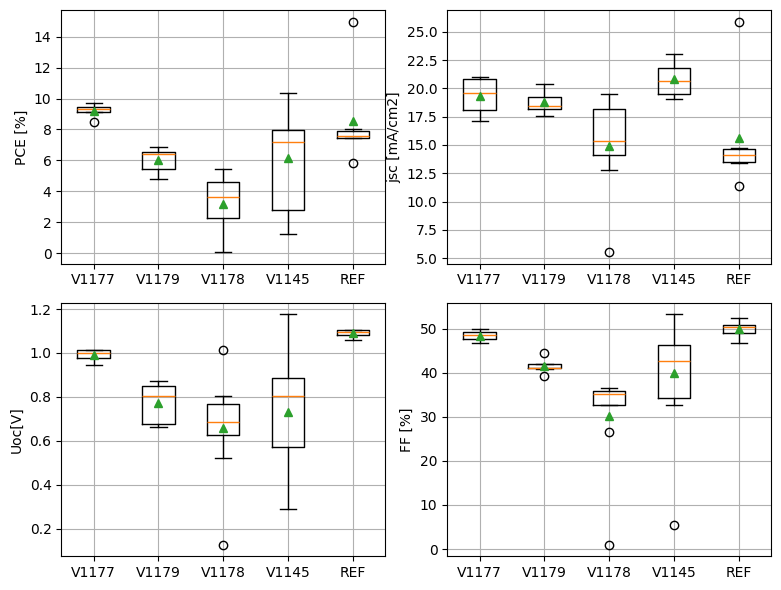

In [73]:
print('27 paskaita (užduotis nuo 26 paskaitos)')

# kuriami tušti sąrašai ..L
medL=[] # medžiaga
pceL=[]
jscL=[]
UocL=[]
FF_L=[]

# iš failų į sąrašus ..L
for fVardas in glob.glob('../../DATA/OOP_DATA/*.dat'):
    SE_analiz=SolarAnalyzer(fVardas,sep=';',header=1)
    medL.append(SE_analiz.medžiaga)
    pceL.append(SE_analiz.pce)
    jscL.append(SE_analiz.jsc)
    UocL.append(SE_analiz.Uoc)
    FF_L.append(SE_analiz.FF)

# kuriami tušti žodynai
print(f'Medžiaga: {medL}')
medUnique = list(set(medL))
print(medUnique)

pceD = dict.fromkeys(medUnique,None)
for k in pceD.keys():
    pceD[k]=[]

jscD = dict.fromkeys(medUnique,None)
for k in jscD.keys():
    jscD[k]=[]

UocD = dict.fromkeys(medUnique,None)
for k in UocD.keys():
    UocD[k]=[]

FF_D = dict.fromkeys(medUnique,None)
for k in FF_D.keys():
    FF_D[k]=[]

# print(pceD)
# print(jscD)
# print(UocD)
# print(FF_D)

# iš sąrašų (..L) į žodynus (..D)
n = len(FF_L)

for i in range(n):
    pceD[medžiaga[i]].append(pceL[i])
# print(pceD)

for i in range(n):
    jscD[medžiaga[i]].append(jscL[i])
# print(jscD)

for i in range(n):
    UocD[medžiaga[i]].append(UocL[i])
# print(UocD)

for i in range(n):
    FF_D[medžiaga[i]].append(FF_L[i])
# print(FF_D)

# išvesti rezultatus
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(8,6))

ax1.boxplot(pceD.values(),showmeans=True,showfliers=True)
ax1.set_xticklabels(medUnique)
ax1.set_ylabel('PCE [%]')
ax1.grid()

ax2.boxplot(jscD.values(),showmeans=True,showfliers=True)
ax2.set_xticklabels(medUnique)
ax2.set_ylabel('jsc [mA/cm2]')
ax2.grid()

ax3.boxplot(UocD.values(),showmeans=True,showfliers=True)
ax3.set_xticklabels(medUnique)
ax3.set_ylabel('Uoc[V]')
ax3.grid()

ax4.boxplot(FF_D.values(),showmeans=True,showfliers=True)
ax4.set_xticklabels(medUnique)
ax4.set_ylabel('FF [%]')
ax4.grid()

fig.tight_layout()
plt.show()